<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/wine-recognition/wine-classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja wieloetykietowa
Ten zbiór definiuje 3 różne klasy.

Użyj sklearn.multiclass.OneVsRestClassifier żeby zastosować poprzednie klasyfikatory na nowych danych.

Przy liczeniu krzywy ROC i wartości AUC użyj sklearn.preprocessing.label_binarize na referncji i metody ravel() na macierzach wyjściowych przed narysowaniem.

:https://rasbt.github.io/mlxtend/user_guide/data/wine_data/

In [2]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from statistics import stdev
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold

## Miary jakości modelu

Wczytaj następujące metody:
```
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
```

Zrób zwykły podział train/test 90/10. Dla wszystkich modeli oprócz regresji liniowej, zastosuj odpowiednio metody `fit` na danych treningowych i `predict` na danych testowych. Potem policz odpowiednio dokładność (`accuracy_score`), precyzję (`precision`), czułóść (`recall`), f-score i macierz konfuzji dla poszczególnych klasyfikatorów. Użyj też metody `classification_report` żeby zobaczyć ogólny raport:

In [1]:
from sklearn.datasets import load_wine
from sklearn.metrics import auc

wide_dataset = load_wine()

print(wide_dataset.keys())

X, y = wide_dataset["data"], wide_dataset["target"]
print(wide_dataset["data"].size)
print(wide_dataset["target"].size)

print(wide_dataset["feature_names"])
print(wide_dataset["target_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
2314
178
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [3]:
classifiers = [ GaussianNB(),
                SVC(probability=True),
                MLPClassifier(max_iter=3000),
                KNeighborsClassifier(),
                SGDClassifier(loss='log')]

## Walidacja krzyżowa

Przy niewielkim zbiorze danych, ciężko jest wydzielić reprezentatywny zbiór testowy. Jeden ze sposobów jest uruchomić cały proces kilka razy i raportować średnie i odchylenia uzyskanych wyników.

Lepszym sposobem jest podzielić cały zbiór danych na `K` paczek i iteracyjnie użyć każdej paczki jako dane testowe, a wszystkie inne (w każdej iteracji) jako dane treningowe.

Użyj klasy `StratifiedKFold` z modułu `sklearn.model_selection` żeby podzielić zbiór na 5 części i powtórz poprzedni eksperyment do liczenia dokładności modeli. Jako wynik podaj wartość średnią i odchylenie standardowe dla wsyzstkich podziałów danego modelu.

## ROC i AUC

Użyj wszystkich modeli oprócz regresji liniowej i GPC, a dla SVC dodaj parametr `probability=True`. Użyj walidacji krzyżowej żeby wytrenować każdy z modeli i policzyć `predict_proba` dla całego zbioru. Potem policz `roc_curve` i `auc_score` dla wszystkich modeli i narysuj na wykresie.

Najpierw użyj tych poleceń żeby otrzymać pusty wykres ROC:

```
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')
```

Dla każdego klasyfikatora użyj metody `plot` żeby narysować wartości `x=fpr` i `y=tpr` z metody `roc_curve`, a jako `label` ustaw nazwę modelu i jego `AUC`. Na końcu uruchom metodę `legend(loc='lower right')` żeby narysować legendę w dolnym prawym rogu wykresu.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

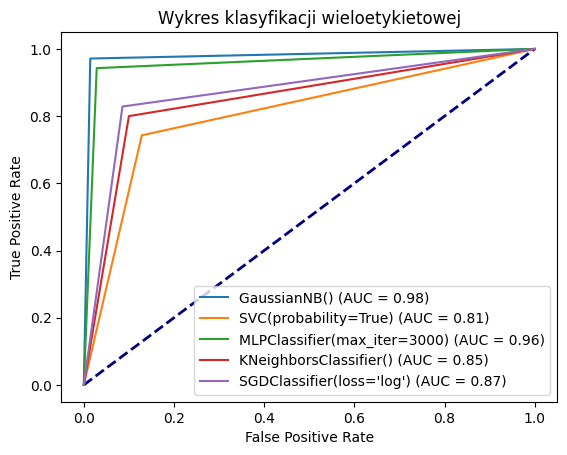

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=5)

plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Wykres klasyfikacji wieloetykietowej")

for classifier in classifiers:
  # acc_for_classifier = []
  # auc_list = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = OneVsRestClassifier(classifier)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)

  y_predict = model.predict(X_test)
  y_test_binarize = label_binarize(y_test, classes=[0,1,2])
  y_pred_binarize = label_binarize(y_predict, classes=[0,1,2])

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  fpr, tpr, roc_auc = {}, {}, {}

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_pred_binarize.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  plt.plot(fpr["micro"], tpr["micro"], label='{}'.format(classifier) + ' (AUC = {:0.2f})'.format(roc_auc["micro"]))

plt.legend(loc="lower right")
plt.show()